# lab4

In [88]:
from qiskit import QuantumCircuit

In [89]:
# tworzymy układ 2 kubity wejścia i 3 bity klasyczne wyjścia
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
# pomiar kubitu 0 i wynik na bit 0
circ.measure(0,0)
# pomiar kubitu 1 i wynik na bit 1
circ.measure(1,1)
circ.draw()

┌───┐ ┌─┐ 
q_0: ┤ H ├──■──┤M├───
 └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
 └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
 0 1

In [90]:
from qiskit import Aer
from qiskit import assemble

In [91]:
simulator = Aer.get_backend('qasm_simulator')
qobj = assemble(circ, shots=100)
results = simulator.run(qobj)

In [92]:
hist = results.result().get_counts()
print(hist)

{'11': 45, '00': 55}


In [93]:
from qiskit.visualization import plot_histogram

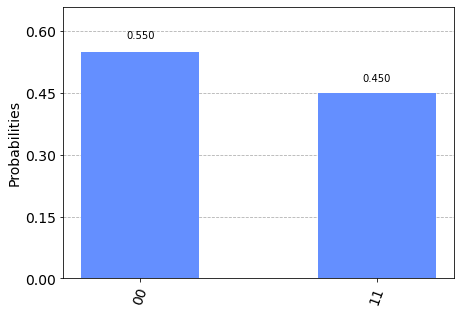

In [94]:
plot_histogram(hist)

In [95]:
# X -> not(qx)
# CX -> if qx == 1 -> not(qx+1)
# CCX -> if qx == 1 && qx+1 == 1 -> not(qx+2)

# f(x) = x + 5 mod 8

# f(0) = 5    000 -> 101
# f(1) = 6    001 -> 110
# f(2) = 7    010 -> 111
# f(3) = 0    011 -> 000
# f(4) = 1    100 -> 001
# f(5) = 2    101 -> 010
# f(6) = 3    110 -> 011
# f(7) = 4    111 -> 100

def mod8(x):
    if x==0:
        pass
    if x==1:
        f.x(0)
    if x==2:
        f.x(1)
    if x==3:
        f.x(0)
        f.x(1)
    if x==4:
        f.x(2)
    if x==5:
        f.x(2)
        f.x(0)
    if x==6:
        f.x(2)
        f.x(1)
    if x==7:
        f.x(2)
        f.x(1)
        f.x(0)

f = QuantumCircuit(3,3)
mod8(4)
f.barrier()
f.ccx(0,1,2)
f.cx(0,1)
f.barrier()
f.x(0)
f.x(2)
f.barrier()

f.measure(0,0)

f.measure(1,1)
f.measure(2,2)
f.draw()

░ ░ ┌───┐ ░ ┌─┐ 
q_0: ──────░───■────■───░─┤ X ├─░─┤M├──────
 ░ │ ┌─┴─┐ ░ └───┘ ░ └╥┘┌─┐ 
q_1: ──────░───■──┤ X ├─░───────░──╫─┤M├───
 ┌───┐ ░ ┌─┴─┐└───┘ ░ ┌───┐ ░ ║ └╥┘┌─┐
q_2: ┤ X ├─░─┤ X ├──────░─┤ X ├─░──╫──╫─┤M├
 └───┘ ░ └───┘ ░ └───┘ ░ ║ ║ └╥┘
c: 3/══════════════════════════════╩══╩══╩═
 0 1 2

In [96]:
qobj = assemble(circ, shots=100)
results = simulator.run(qobj)

hist = results.result().get_counts()
print(hist)

{'11': 50, '00': 50}


# lab5

In [97]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import random_statevector

In [98]:
qr = QuantumRegister(3) # Protocol uses 3 qubits
cr1 = ClassicalRegister(1,name="cr1")
cr2 = ClassicalRegister(1,name="cr2")
tel = QuantumCircuit(qr,cr1,cr2)
# inicjujemy wektor do telepotacji na kubicie 0
#tel.initialize([1/sqrt(2), 1/sqrt(2)], 0) 
#losujemy losowy kubit
psi = random_statevector(2)
tel.initialize(psi, 0)
tel.barrier()
tel.h(1)
tel.cx(1,2)
tel.cx(0,1)
tel.h(0)
tel.barrier()
tel.measure(0,0)
tel.measure(1,1)
tel.draw()

┌─────────────────────────────────────────────────┐ ░ »
q87_0: ┤ Initialize(-0.094754+0.61805j,0.60684+0.49069j) ├─░─────────────■──»
 └─────────────────────────────────────────────────┘ ░ ┌───┐ ┌─┴─┐»
q87_1: ────────────────────────────────────────────────────░─┤ H ├──■──┤ X ├»
 ░ └───┘┌─┴─┐└───┘»
q87_2: ────────────────────────────────────────────────────░──────┤ X ├─────»
 ░ └───┘ »
cr1: 1/═════════════════════════════════════════════════════════════════════»
 »
cr2: 1/═════════════════════════════════════════════════════════════════════»
 »
« ┌───┐ ░ ┌─┐ 
«q87_0: ┤ H ├─░─┤M├───
« └───┘ ░ └╥┘┌─┐
«q87_1: ──────░──╫─┤M├
« ░ ║ └╥┘
«q87_2: ──────░──╫──╫─
« ░ ║ ║ 
«cr1: 1/═════════╩══╬═
« 0 ║ 
«cr2: 1/════════════╩═
« 0

In [99]:
from qiskit import Aer
from qiskit import assemble

In [100]:
simulator = Aer.get_backend('qasm_simulator')
telas = assemble(tel, shots=1)
wyniki = simulator.run(telas)

In [101]:
hist = wyniki.result().get_counts()
print(hist)

{'1 0': 1}


In [102]:
tel.x(2).c_if(cr1, 1) 
# jesli cr1 ma wartosc 1 to dzialaj na tel bramka X 
tel.z(2).c_if(cr2, 1)

In [103]:
sym = Aer.get_backend('statevector_simulator')
qpom = assemble(tel)
result = sym.run(qpom).result()
stan_wektora = result.get_statevector()
print(stan_wektora)

Statevector([ 0.        +0.j        ,  0.        -0.j        ,
             -0.        +0.j        , -0.09475424+0.61805296j,
              0.        -0.j        ,  0.        -0.j        ,
             -0.        +0.j        ,  0.60684456+0.49068509j],
            dims=(2, 2, 2))


In [104]:
circ = QuantumCircuit(2,2)

oracle = QuantumCircuit(2)
oracle.x(1)
oracle_gate = oracle.to_gate()
oracle_gate.name = "Oracle"

circ.h(0)
circ.h(1)
circ.append(oracle_gate, range(2))
circ.h(0)
circ.measure(0,0)
circ.draw()

┌───┐┌─────────┐┌───┐┌─┐
q_0: ┤ H ├┤0 ├┤ H ├┤M├
 ├───┤│ Oracle │└───┘└╥┘
q_1: ┤ H ├┤1 ├──────╫─
 └───┘└─────────┘ ║ 
c: 2/══════════════════════╩═
 0

# miniprojekt1

In [105]:
from qiskit import QuantumCircuit, Aer, assemble

In [106]:
# f(x) = x + 470625 mod 8

# f(0) = 1    000 -> 001
# f(1) = 2    001 -> 010
# f(2) = 3    010 -> 011
# f(3) = 4    011 -> 100
# f(4) = 5    100 -> 101
# f(5) = 6    101 -> 110
# f(6) = 7    110 -> 111
# f(7) = 0    111 -> 000

def mod8(x):
    if x==0:
        pass
    if x==1:
        f.x(0)
    if x==2:
        f.x(1)
    if x==3:
        f.x(0)
        f.x(1)
    if x==4:
        f.x(2)
    if x==5:
        f.x(2)
        f.x(0)
    if x==6:
        f.x(2)
        f.x(1)
    if x==7:
        f.x(2)
        f.x(1)
        f.x(0)

f = QuantumCircuit(3,3)
mod8(7)
f.ccx(0,1,2)
f.cx(0,1)
f.x(0)
f.barrier()
f.measure(0,0)
f.measure(1,1)
f.measure(2,2)
f.draw()

┌───┐ ┌───┐ ░ ┌─┐ 
q_0: ┤ X ├──■────■──┤ X ├─░─┤M├──────
 ├───┤ │ ┌─┴─┐└───┘ ░ └╥┘┌─┐ 
q_1: ┤ X ├──■──┤ X ├──────░──╫─┤M├───
 ├───┤┌─┴─┐└───┘ ░ ║ └╥┘┌─┐
q_2: ┤ X ├┤ X ├───────────░──╫──╫─┤M├
 └───┘└───┘ ░ ║ ║ └╥┘
c: 3/════════════════════════╩══╩══╩═
 0 1 2

In [107]:
symulator=Aer.get_backend('qasm_simulator')
fas=assemble(f, shots=1)
wyniki=symulator.run(fas)
hist=wyniki.result().get_counts()
print(hist)

{'000': 1}


In [108]:
# f(x) = x + 470625 mod 16

# f(0) = 1      0000 -> 0001
# f(1) = 2      0001 -> 0010
# f(2) = 3      0010 -> 0011
# f(3) = 4      0011 -> 0100
# f(4) = 5      0100 -> 0101
# f(5) = 6      0101 -> 0110
# f(6) = 7      0110 -> 0111
# f(7) = 8      0111 -> 1000
# f(8) = 9      1000 -> 1001
# f(9) = 10     1001 -> 1010
# f(10) = 11    1010 -> 1011
# f(11) = 12    1011 -> 1100
# f(12) = 13    1100 -> 1101
# f(13) = 14    1101 -> 1110
# f(14) = 15    1110 -> 1111
# f(15) = 0     1111 -> 0000

def mod16(x):
    if x==0:
        pass
    if x==1:
        f.x(0)
    if x==2:
        f.x(1)
    if x==3:
        f.x(0)
        f.x(1)
    if x==4:
        f.x(2)
    if x==5:
        f.x(2)
        f.x(0)
    if x==6:
        f.x(2)
        f.x(1)
    if x==7:
        f.x(2)
        f.x(1)
        f.x(0)
    if x==8:
        f.x(3)
    if x==9:
        f.x(3)
        f.x(0)
    if x==10:
        f.x(3)
        f.x(1)
    if x==11:
        f.x(3)
        f.x(0)
        f.x(1)
    if x==12:
        f.x(3)
        f.x(2)
    if x==13:
        f.x(3)
        f.x(2)
        f.x(0)
    if x==14:
        f.x(3)
        f.x(2)
        f.x(1)
    if x==15:
        f.x(3)
        f.x(2)
        f.x(1)
        f.x(0)

f = QuantumCircuit(5,4)
mod16(7)
f.ccx(0,1,4)
f.ccx(2,4,3)
f.ccx(0,1,2)
f.cx(0,1)
f.x(0)
f.barrier()
f.measure(0,0)
f.measure(1,1)
f.measure(2,2)
f.measure(3,3)
f.draw()

┌───┐ ┌───┐ ░ ┌─┐ 
q_0: ┤ X ├──■─────────■────■──┤ X ├─░─┤M├─────────
 ├───┤ │ │ ┌─┴─┐└───┘ ░ └╥┘┌─┐ 
q_1: ┤ X ├──■─────────■──┤ X ├──────░──╫─┤M├──────
 ├───┤ │ ┌─┴─┐└───┘ ░ ║ └╥┘┌─┐ 
q_2: ┤ X ├──┼────■──┤ X ├───────────░──╫──╫─┤M├───
 └───┘ │ ┌─┴─┐└───┘ ░ ║ ║ └╥┘┌─┐
q_3: ───────┼──┤ X ├────────────────░──╫──╫──╫─┤M├
 ┌─┴─┐└─┬─┘ ░ ║ ║ ║ └╥┘
q_4: ─────┤ X ├──■──────────────────░──╫──╫──╫──╫─
 └───┘ ░ ║ ║ ║ ║ 
c: 4/══════════════════════════════════╩══╩══╩══╩═
 0 1 2 3

In [109]:
symulator=Aer.get_backend('qasm_simulator')
fas=assemble(f, shots=1)
wyniki=symulator.run(fas)
hist=wyniki.result().get_counts()
print(hist)

{'1000': 1}


# miniprojekt2

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from numpy.random import randint
import numpy as np
from qiskit.providers.aer import QasmSimulator

In [11]:
num_qubits = 32

alice_state = np.random.randint(2, size=num_qubits)
# alice_state = np.array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])
# alice_state = np.array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1])
alice_basis = np.random.randint(2, size=num_qubits)
# alice_basis = np.array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])
# alice_basis = np.array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1])
bob_basis = np.random.randint(2, size=num_qubits)
# bob_basis = np.array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
# bob_basis = np.array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1])


print(f"Alice's State:\t {np.array2string(alice_state)}")
print(f"Alice's Bases:\t {np.array2string(alice_basis)}")
print(f"Bob's Bases:\t {np.array2string(bob_basis)}")

Alice's State:	 [0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1]
Alice's Bases:	 [1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1]
Bob's Bases:	 [0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0]


In [12]:
def bb84_circuit(state, basis, measurement_basis):

    num_qubits = len(state)
    
    circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)
        if basis[i] == 1:
            circuit.h(i)
   

    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)

       
    circuit.measure_all()
    
    return circuit

In [13]:
circuit = bb84_circuit(alice_state, alice_basis, bob_basis)
key = execute(circuit.reverse_bits(),backend=QasmSimulator(),shots=1).result().get_counts().most_frequent()
encryption_key = ''
for i in range(len(key)):
    if alice_basis[i] == bob_basis[i]:
         encryption_key += str(key[i])
print(f"Key: {encryption_key}")

Key: 11011000001001


In [14]:
circuit.draw()

┌───┐ ░ ┌─┐ »
 q_0: ┤ H ├───────────░─┤M├────────────────────────────────────────────────»
 ├───┤ ░ └╥┘┌─┐ »
 q_1: ┤ X ├───────────░──╫─┤M├─────────────────────────────────────────────»
 ├───┤┌───┐ ░ ║ └╥┘┌─┐ »
 q_2: ┤ X ├┤ H ├──────░──╫──╫─┤M├──────────────────────────────────────────»
 ├───┤└───┘ ░ ║ ║ └╥┘┌─┐ »
 q_3: ┤ X ├───────────░──╫──╫──╫─┤M├───────────────────────────────────────»
 ├───┤┌───┐ ░ ║ ║ ║ └╥┘┌─┐ »
 q_4: ┤ X ├┤ H ├──────░──╫──╫──╫──╫─┤M├────────────────────────────────────»
 ├───┤├───┤ ░ ║ ║ ║ ║ └╥┘┌─┐ »
 q_5: ┤ H ├┤ H ├──────░──╫──╫──╫──╫──╫─┤M├─────────────────────────────────»
 ├───┤└───┘ ░ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_6: ┤ X ├───────────░──╫──╫──╫──╫──╫──╫─┤M├──────────────────────────────»
 ├───┤ ░ ║ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_7: ┤ X ├───────────░──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────────────────»
 ├───┤ ░ ║ ║ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_8: ┤ H ├───────────░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────»
 └───┘ ░ ║ ║ ║ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_9: ────────────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────»
 ┌───┐ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_10: ┤ H ├───────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────»
 ├───┤┌───┐ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_11: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────»
 ├───┤├───┤ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_12: ┤ H ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────»
 ├───┤├───┤ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_13: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────»
 ├───┤└───┘ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_14: ┤ H ├───────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────»
 ├───┤ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ └╥┘┌─┐ »
 q_15: ┤ H ├───────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───»
 └───┘ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ └╥┘┌─┐»
 q_16: ────────────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├»
 ┌───┐┌───┐ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ └╥┘»
 q_17: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤├───┤ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_18: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤└───┘ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_19: ┤ H ├───────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤┌───┐ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_20: ┤ H ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤└───┘ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_21: ┤ H ├───────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤┌───┐ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_22: ┤ H ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤├───┤┌───┐ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_23: ┤ X ├┤ H ├┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤└───┘└───┘ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_24: ┤ H ├───────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤┌───┐ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_25: ┤ H ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤├───┤ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_26: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤├───┤ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_27: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤├───┤ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_28: ┤ H ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤└───┘ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_29: ┤ H ├───────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_30: ┤ X ├───────────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 ├───┤┌───┐ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
 q_31: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
 └───┘└───┘ ░ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ ║ »
meas: 32/═══════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═»
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16»